# 1.  Write a python code to
1.   Generate the following $n$ data points
    \begin{equation}
      y_i = 3 x_i + w_i, \;\; i = 1,2,\ldots,n
    \end{equation}
  where $x_i \stackrel{i.i.d.}{\sim} Unif[-1,1]$ and $w_i \stackrel{i.i.d.}{\sim} {N}(0,0.2)$.
2. Plot (scatter) the data, i.e., $(x_i,y_i)$, $i=1,2,\ldots,n$.
2. Find a line that "best" fits the above data point without using any additional information.



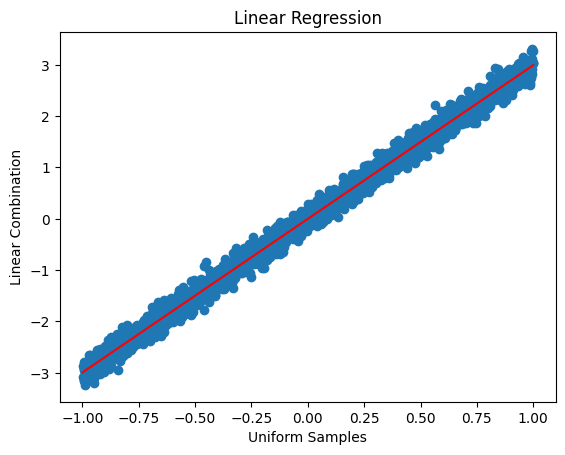

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

weight_uniform = 3
weight_gaussian = 1
samples = 2000

# Random samples from uniform distribution
uniform_samples = np.random.uniform(low=-1, high=1, size=samples)

# Random samples from Gaussian distribution
gaussian_samples = np.random.normal(loc=0, scale=np.sqrt(0.02), size=samples)

# Linear combination
linear_combination = weight_uniform * uniform_samples + weight_gaussian * gaussian_samples

# Calculate the coefficients using least squares method
x_mean = np.mean(uniform_samples)
y_mean = np.mean(linear_combination)

num = 0
den = 0
for i in range(samples):
    num += (uniform_samples[i] - x_mean) * (linear_combination[i] - y_mean)
    den += (uniform_samples[i] - x_mean) ** 2

b1 = num / den
b0 = y_mean - (b1 * x_mean)

# Plot the scatter plot and linear regression line
plt.scatter(uniform_samples, linear_combination)
xx = np.linspace(-1, 1, samples)
yy = b1 * xx + b0
plt.plot(xx, yy, color='red')
plt.xlabel('Uniform Samples')
plt.ylabel('Linear Combination')
plt.title('Linear Regression')
plt.show()

2. Consider a linear regression model with $N$ observations and $m$ features, represented by the matrix equation:
\begin{equation}
    Y = A^T \mathbf x + \mathbf w,
\end{equation}

where:

*   $\mathbf y$ is the $n×1$ vector,
*   A is the $m×n$ matrix
*   $\mathbf x$ is the $m×1$ vector
*   $\mathbf w$ is the $n×1$ vector

  1. Suppose $A = \mathbf{a} = (9/2,~ 17/2 )^T$ and $\mathbf w \sim {N}(0, 0.2)$, then write a python code to generate $N$ data points $(\mathbf y_i, \mathbf x_i)$ pairs, where $i = \{1,2, \ldots, N\}$.
  2. Assuming that you these observe $n$ data points, find an estimate of $A$.

In [ ]:
# Write your code here

import numpy as np
N = 1000
A = np.array([9/2, 17/2])

m=2
n=1
A=np.array([A]).T #Convert A into a Matrix os shape 2x1..................


w = np.random.normal(0, np.sqrt(0.2), (n, N))  # Initialize w vector...
x = np.random.randn(m, N)  # Initialize X with a random vector...........
y = np.dot(A.T, x) + w  # Calculate y values.............................


for i in range(10): #print some points...................................
    print(f"Data Point {i+1}: y = {y[0, i]}, x = {x[:, i]}")

Data Point 1: y = -5.905720657745184, x = [ 1.90506364 -1.68472896]
Data Point 2: y = -4.926436868723417, x = [-0.01477722 -0.49941676]
Data Point 3: y = -13.768959761324666, x = [-0.30047879 -1.42693769]
Data Point 4: y = -10.518812361826022, x = [-0.35502873 -0.93257023]
Data Point 5: y = -16.841902313016867, x = [-1.89236189 -1.01245715]
Data Point 6: y = 9.113222465593513, x = [-0.17781314  1.25056983]
Data Point 7: y = -1.3579770187229683, x = [ 0.25099812 -0.23453803]
Data Point 8: y = -2.5687828454380384, x = [ 1.05475793 -0.86335558]
Data Point 9: y = -4.81317650830841, x = [ 0.96004774 -1.03560573]
Data Point 10: y = 0.01998213556365047, x = [-0.41649908  0.14166716]


In [ ]:
# Function to estimate A using linear regression   BUIT IN FUNCTION
def estimator( x_values,y_values):
    est = np.linalg.lstsq(x_values.T, y_values.T, rcond=None)[0].T
    return est
estimated_A = estimator(x,y)

print(f"True A: {A}")
print(f"Estimated A: {estimated_A.flatten()}")

True A: [[4.5]
 [8.5]]
Estimated A: [4.48086655 8.49005256]


In [ ]:
# MANUAL CALCU.     Ordinary least square
from numpy.linalg import inv
p = np.dot((y-w), x.T)
xxt = np.dot(x,x.T)
estimated_value = np.dot(p, inv(xxt))
print(estimated_value)

3. Write a python code to generate $N$ data points $(x_i,y_i)$ as follows


\begin{align}
r_i = R + w_i \\
\theta_i = \theta + u_i
\end{align}
where $R = 1$, $\theta = \pi/4$, $u_i \sim {Unif}(0,\pi/2)$, $x_i = r_i*cos(\theta)$, $w_i \sim N(0,0.2)$, and $y_i = r_i*sin(\theta)$, $i=1,2,\ldots,N$.

* Fit a circle/arc given these $N$ data points. If necessary, make changes to the variance of the noise for better visualization.

In [ ]:
!pip install scikit-guess

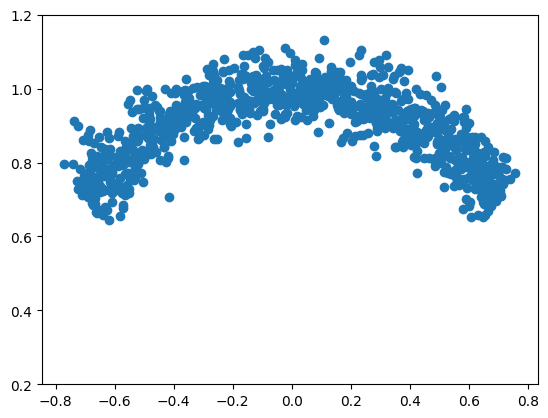

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from skg import nsphere_fit


N = 1000
R = 1.0
theta = np.pi / 4
w_i = np.random.normal(0, 0.05, N) #I changed variance to 0.05 for better visualiztion of plots
u_i = np.random.uniform(0, np.pi / 2, N)

r_i = R + w_i
theta_i = theta + u_i

x_i = r_i * np.cos(theta_i)
y_i = r_i * np.sin(theta_i)

plt.scatter(x_i,y_i)
plt.yticks(np.arange(0.2,1.4, step=0.2))
plt.show()

Radius : 0.801193908763248
Center Co-ordinates: [-0.00043563  0.23116305]


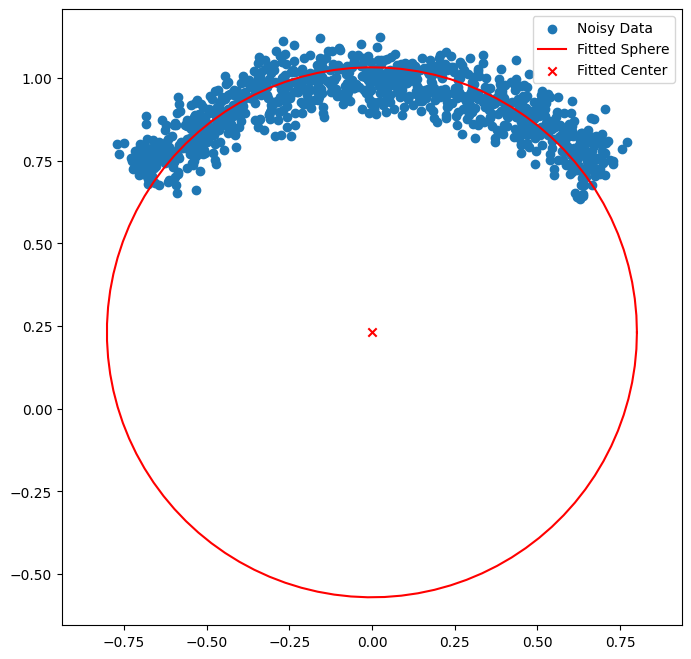

In [ ]:
# CURVE FITTING

noisy_data = np.column_stack((x_i,y_i))
radius,center = nsphere_fit(noisy_data)
theta = np.linspace(0, 2 * np.pi, 100)
print("Radius :",radius)
print("Center Co-ordinates:",center)
# Plot the results
plt.figure(figsize=(8,8))
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], label='Noisy Data')
fit_circle_points = np.array([center[0] + radius * np.cos(theta),center[1] + radius * np.sin(theta)]).T
plt.plot(fit_circle_points[:, 0], fit_circle_points[:, 1], label='Fitted Sphere', color='red')
plt.scatter(center[0], center[1], color='red', marker='x', label='Fitted Center')
plt.legend()
plt.axis('equal')
plt.show()

# 4. Solve Problem 14 in page 273 of the book. Write a gradient descent based algorithm to solve for $\mathbf{a}$ in the problem.

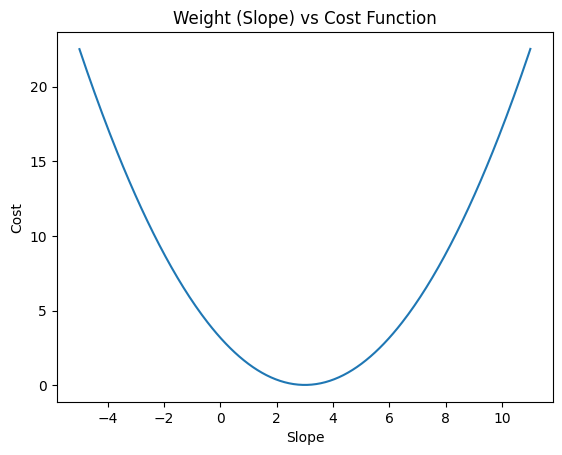

In [ ]:
# Write your code here

import numpy as np
import matplotlib.pyplot as plt

m=np.linspace(-5,11,300)
tot_samples=300
x = np.random.uniform(low=-1,high=1,size=tot_samples)
ww = np.random.normal(loc=0,scale=np.sqrt(0.02),size=tot_samples)
y = 3*x + ww
N = tot_samples

def J(m):
    su=0
    for i in range(N):
        error = y[i] - m*x[i]
        sq_er = error**2
        su += sq_er
    return su/N

j=[J(i) for i in m]
plt.figure()
plt.plot(m,j)
plt.title("Weight (Slope) vs Cost Function")
plt.xlabel("Slope")
plt.ylabel("Cost")
plt.show()

Slope :  2.9692684804197143
Intercept :  -0.004071861382152495


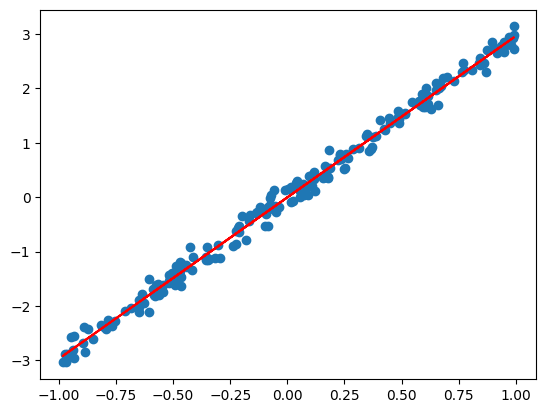

In first case we get
Slope :  2.9692684804197143
Intercept :  -0.004071861382152495

In Second case we get
Slope :  2.971112357245883
Intercept :  -0.0040731452582410295

Almost in both methods we got same values.


In [ ]:
tot_samples=300
x = uniform_samples
y = linear_combination
N = samples

# Initiializing random values
m = 2
c = 0.1

L = 0.1  # The learning Rate
epochs = 200

n = float(len(x)) # Number of elements in X
slope_history = []
# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-1/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-1/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    slope_history.append(m)


print("Slope : ",m)
print("Intercept : ",c)

# Making predictions
Y_pred = m*x + c

plt.scatter(x, y)
plt.plot(x,Y_pred,color='red')  # regression line
plt.show()

###############################################################################


print("In first case we get")
print("Slope : ",m)
print("Intercept : ",c)
print()
print("In Second case we get")
print("Slope : ",b1)
print("Intercept : ",b0)
print()
print("Almost in both methods we got same values.")

5. Solve the first problem above using gradient descent, and verify that the solution that you got analytically matches with the numerical solution.